In [1]:
import math
import pandas as pd
import numpy as np
import scipy.special
from string import ascii_letters

from scipy.stats.kde import gaussian_kde

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import matplotlib as mpl

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import seaborn as sns

from bokeh.charts import Histogram, output_file, show
from bokeh.io import output_notebook



//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
output_notebook()
print __version__ 
init_notebook_mode(connected=True)

Loading BokehJS ...

2.0.11


# WRITE SOMETHING HERE ABOUT THE PROJECT

SOMETIHNG SOMETHING

In [3]:
#read in data
df = pd.read_csv(r'https://github.com/bgweber/StarCraftMining/raw/master/data/scmPvT_Protoss_Mid.csv', skiprows=1, header=None, names = ['ProtossPylon','ProtossSecondPylon','ProtossFirstGas','ProtossSecondGas','ProtossFirstExpansion','ProtossSecondExpansion','ProtossThirdExpansion','ProtossFourthExpansion','ProtossGateway','ProtossSecondGatway','ProtossThirdGatway','ProtossFourthGatway','ProtossCore','ProtossZealot','ProtossGoon','ProtossRange','ProtossForge',
'ProtossCannon','ProtossGroundWeapons1','ProtossGroundArmor1','ProtossShields1','ProtossGroundWeapons2','ProtossGroundArmor2','ProtossShields2','ProtossCitadel','ProtossLegs','ProtossArchives','ProtossTemplar','ProtossArchon','ProtossStorm','ProtossDarkTemplar','ProtossDarkArchon','ProtossMaelstorm','ProtossRoboBay','ProtossShuttle','ProtossShuttleSpeed','ProtossRoboSupport','ProtossReavor','ProtossReavorDamage','ProtossReavorCapacity','ProtossObservory','ProtossObs',
'ProtossStargate','ProtossCorsair','ProtossDisruptionWeb','ProtossFleetBeason','ProtossCarrier','ProtossCarrierCapacity','ProtossTribunal',
'ProtossArbitor','ProtossStatis','ProtossRecall','ProtossAirWeapons1','ProtossAirArmor1','ProtossAirWeapons2','ProtossAirArmor2','midBuild'])

#Full data sett 100% as matrix
targetDataframe = df.iloc[:,:-1].as_matrix()
dataFrame = df.as_matrix()
name = df.columns.values


df = df[['ProtossPylon','ProtossSecondPylon','ProtossFirstGas','ProtossSecondGas','ProtossFirstExpansion','ProtossSecondExpansion','ProtossThirdExpansion','ProtossFourthExpansion','ProtossGateway','ProtossSecondGatway','ProtossThirdGatway','ProtossFourthGatway','ProtossCore','ProtossZealot','ProtossGoon','ProtossRange','ProtossForge',
'ProtossCannon','ProtossGroundWeapons1','ProtossGroundArmor1','ProtossShields1','ProtossGroundWeapons2','ProtossCitadel','ProtossLegs','ProtossArchives','ProtossTemplar','ProtossArchon','ProtossStorm','ProtossDarkTemplar','ProtossRoboBay','ProtossShuttle','ProtossReavor','ProtossObservory','ProtossObs',
'ProtossStargate','ProtossCarrier','ProtossCarrierCapacity','ProtossAirWeapons1','ProtossAirArmor1','midBuild']]

names = ['ProtossPylon','ProtossSecondPylon','ProtossFirstGas','ProtossSecondGas','ProtossFirstExpansion','ProtossSecondExpansion','ProtossThirdExpansion','ProtossFourthExpansion','ProtossGateway','ProtossSecondGatway','ProtossThirdGatway','ProtossFourthGatway','ProtossCore','ProtossZealot','ProtossGoon','ProtossRange','ProtossForge',
'ProtossCannon','ProtossGroundWeapons1','ProtossGroundArmor1','ProtossShields1','ProtossGroundWeapons2','ProtossCitadel','ProtossLegs','ProtossArchives','ProtossTemplar','ProtossArchon','ProtossStorm','ProtossDarkTemplar','ProtossRoboBay','ProtossShuttle','ProtossReavor','ProtossObservory','ProtossObs',
'ProtossStargate','ProtossCarrier','ProtossCarrierCapacity','ProtossAirWeapons1','ProtossAirArmor1']


droppedAttributes = ['ProtossDisruptionWeb','ProtossReavorCapacity','ProtossReavorDamage'
,'ProtossCorsair','ProtossAirWeapons2','ProtossGroundArmor2','ProtossAirArmor2','ProtossDarkArchon'
,'ProtossMaelstorm','ProtossShields2','ProtossFleetBeason''ProtossTribunal','ProtossArbitor','ProtossStatis'
,'ProtossRecall','ProtossRoboSupport','ProtossShuttleSpeed']


In [4]:
################################
#find outliers, clean shit up


# for col in names:
#     p = Histogram(df[col])
#     show(p)

for col in range(1,39):
    m = df.iloc[:,col].dropna().quantile(0.97)
    df.iloc[:,col]=df.iloc[:,col].map(lambda x: None if x>m else x)

#drop outliers
dfDropped =df.dropna()

'''
Bokeh Distribution graph to justify how our data looks
'''
# for col in names:
#     p = Histogram(dfDropped[col])
#     show(p)


'\nBokeh Distribution graph to justify how our data looks\n'

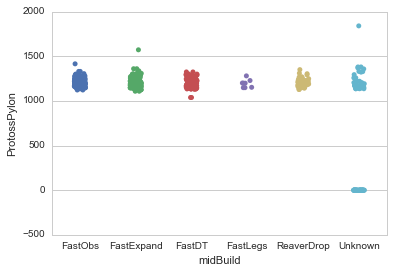

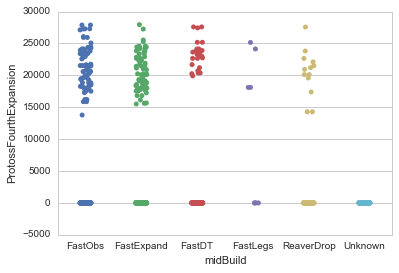

In [14]:
'''
Categorical Scatterplot using Seaborn
'''
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(x="midBuild", y="ProtossPylon", data=dfDropped, jitter=True)
plt.show()

sns.stripplot(x="midBuild", y="ProtossFourthExpansion", data=dfDropped, jitter=True)
plt.show()

In [17]:
#build data 80%
build_data = dfDropped.sample(frac=.8)
build_data_labels = build_data['midBuild']
build_data = build_data.iloc[:,:-1]
#test data rest 20%
test_data = dfDropped.loc[~dfDropped.index.isin(build_data.index)]
test_data_labels = test_data['midBuild']
test_data = test_data.iloc[:,:-1]

#cleaned target as matrix
targetMatrix = dfDropped['midBuild'].as_matrix()

#clean data as df
dfDropped = dfDropped.iloc[:,:-1]
dfPreProsesed = preprocessing.StandardScaler().fit_transform(dfDropped)

#cleaned data as matrix
dataMatrix = dfDropped.as_matrix()


#####################################
#GradientBoostingClassifier
model_best = GradientBoostingClassifier(n_estimators=50,max_depth=2)
model_best.fit(build_data,build_data_labels)
yhat = model_best.predict(build_data)
value = model_best.feature_importances_



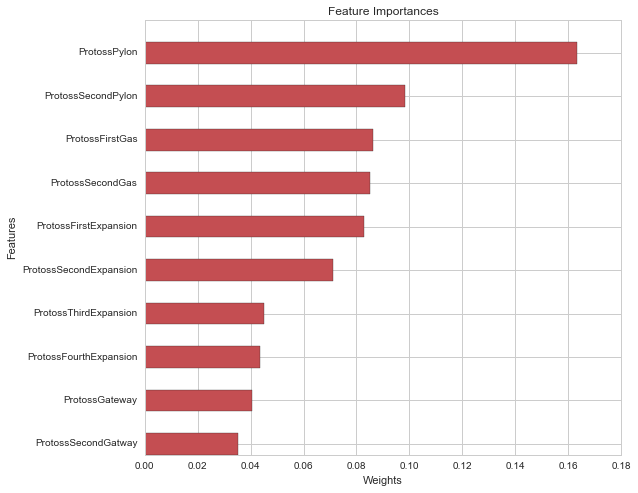

In [19]:
ind=sorted(range(len(value)),reverse=False,key=lambda k: value[k])
features=name[ind]
value=sorted(value,reverse=False)
value = value[:10]
ind=np.array(range(10))

################################
#feature Importance
plt.rcParams['figure.figsize'] = (9,7)
plt.barh(bottom=ind,height=0.5,width=value,color='r')
plt.yticks(ind+0.25,features)
plt.xlabel('Weights')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [ ]:
################################
# Pie chart using plotly
trace = go.Pie(labels=features, values=value)
iplot([trace], filename='GB_pie_chart')


In [ ]:
'''
Categorical Scatterplot using Seaborn
'''
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(x="midBuild", y="ProtossGroudArmor1", data=dfDropped, jitter=True)
plt.show()


In [ ]:
#This is a scatterplot using Bokeh
#It shows the relation between the Best featuture from the GB_feature_importance.png
# vs the 10th best feature from GB_feature_importance.png
from bokeh.charts import Scatter, output_file, show

p1 = Scatter(dfDropped, x='ProtossGroundArmor1', y='ProtossStatis', title="Ground Armor 1 vs Dark Archon",
            xlabel="Ground Armor", ylabel="Staisis information")

output_file("scatter.html")

show(p1)
'''
The scatterplot show that there isnt to much correlation between the two attributes
While we can see some correlation in the center,
compared to how many datapoint we use there is littel to no correlation.
'''
